In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

file_to_load = "Resources/Datafiniti_Fast_Food_Restaurants.csv"
file_to_load2 = "Resources/crime_data_w_population_and_crime_rate.csv"


fastfood_data = pd.read_csv(file_to_load)
ff_counts = fastfood_data['province'].value_counts()
ff_bystate = pd.DataFrame(ff_counts)
ff_bystate = ff_bystate.reset_index(inplace=False)
ff_bystate = ff_bystate.rename(columns={"index":"state"})
ff_bystate = ff_bystate.rename(columns={"province":"number"})
ff_bystate

,state,number
0,CA,1201
1,TX,811
2,FL,621
3,OH,522
4,GA,420
5,IL,405
6,PA,383
7,MI,374
8,NY,352
9,AZ,330


In [80]:
crime_data = pd.read_csv(file_to_load2)
crime_data[['county','state']] = crime_data['county_name'].str.split(', ',expand=True)
crime_data["crime_rate"] = crime_data['crime_rate_per_100000']/1000
crime_data = crime_data[['state','crime_rate']]
crime_bystate = crime_data.groupby(['state'])
avg_bystate = crime_bystate.mean()
avg_bystate["crime_rate"] = round(avg_bystate["crime_rate"],2)
avg_bystate = avg_bystate.drop(avg_bystate.index[7])
avg_bystate

,crime_rate
state,
AK,0.29
AL,0.39
AR,0.33
AZ,0.35
CA,0.42
CO,0.18
CT,0.18
DE,0.52
FL,0.41


In [81]:
combined_df = pd.merge(ff_bystate, avg_bystate, on='state', how='inner')

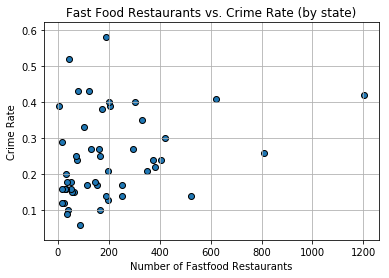

In [82]:
plt.scatter(combined_df["number"],combined_df["crime_rate"], edgecolor="black", marker="o")

plt.title("Fast Food Restaurants vs. Crime Rate (by state)")
plt.ylabel("Crime Rate")
plt.xlabel("Number of Fastfood Restaurants")
plt.grid(True)
plt.savefig("Fast Food Restaurants vs. Crime Rate (by state).png")

plt.show()

In [29]:
file_to_load3 = "Clean_data/cleaned_fastFood.csv"
file_to_load4 = "Clean_data/cleaned_crime_rate.csv"

fastfood_data2 = pd.read_csv(file_to_load3)
fastfood_data2["county/state"] = fastfood_data2.county.str.cat(fastfood_data2.state, sep=", ")
ff_bycounty = fastfood_data2.groupby(['county/state'])
ff_bycounty = ff_bycounty[['number_of_fastfood']]
ff_bycounty = ff_bycounty.sum()

In [30]:
crime_data2 = pd.read_csv(file_to_load4)
crime_data2["county/state"] = crime_data2.county.str.cat(crime_data2.state, sep=", ")
crime_data2["crime rate"] = crime_data2['crime rate/100000']/1000
crime_bycounty = crime_data2.groupby(['county/state'])
crime_bycounty = crime_bycounty[['crime rate']]
crime_bycounty = crime_bycounty.sum()

In [77]:
combined_df2 = pd.merge(ff_bycounty, crime_bycounty, on='county/state', how='inner')
combined_sort = combined_df2.loc[combined_df2["number_of_fastfood"] > 36, :]
combined_sort = combined_sort.reset_index(inplace=False)
combined_sort[['county','state']] = combined_sort['county/state'].str.split(',',expand=True)
combined_sort.sort_values('state', ascending=True)

,county/state,number_of_fastfood,crime rate,county,state
10,"Maricopa County, AZ",137,0.820420,Maricopa County,AZ
18,"San Diego County, CA",52,0.368672,San Diego County,CA
17,"San Bernardino County, CA",39,0.864980,San Bernardino County,CA
15,"Riverside County, CA",39,0.609726,Riverside County,CA
13,"Orange County, CA",72,0.217990,Orange County,CA
9,"Los Angeles County, CA",192,0.889602,Los Angeles County,CA
11,"Miami-Dade County, FL",94,1.312025,Miami-Dade County,FL
1,"Broward County, FL",49,0.941896,Broward County,FL
14,"Orange County, FL",39,0.662631,Orange County,FL
4,"Cook County, IL",86,1.193314,Cook County,IL


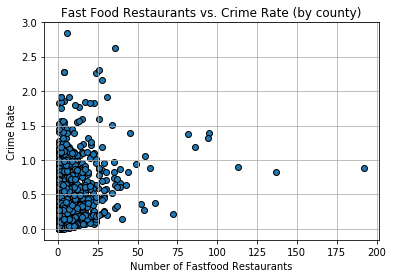

In [39]:
plt.scatter(combined_df2["number_of_fastfood"], combined_df2["crime rate"], edgecolor="black", marker="o")

plt.title("Fast Food Restaurants vs. Crime Rate (by county)")
plt.ylabel("Crime Rate")
plt.xlabel("Number of Fastfood Restaurants")
plt.grid(True)
plt.savefig("Fast Food Restaurants vs. Crime Rate (by county).png")

plt.show()